
Metrics:

Day: Date of the advertising campaign.

Campaign: A segmentation variable set by Company X to target specific groups of users with advertisements.

User Engagement: Indicates the level of engagement of users targeted by the advertising campaign.

Banner: Represents the size of the ad served by an advertising platform, referred to as "Advert Firm A".

Placement: Denotes the publisher space where the ad is served by "Advert Firm A", such as websites or apps.

Displays: The number of ads served by "Advert Firm A" during the campaign period.

Cost: The price paid by "Advert Firm A" to serve the ads to the publisher. It reflects the placement cost of the advertisements.

Clicks: The number of times users clicked on the advertisements during the campaign.

Revenue: The price paid by Company X to "Advert Firm A" for the clicks generated through the advertising campaign.

Post Click Conversions: Represents on-site transactions that occurred within the next 30 days after a user clicked on the advertisement.

Post Click Sales Amount: The monetary value of on-site transactions that occurred within the next 30 days after a user clicked on the advertisement.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
adv = pd.read_csv( '/content/online_advertising_performance_data.csv')
adv.head(3)

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,NaN,NaN
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,NaN,NaN
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,NaN,NaN


In [3]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
dtypes: float64(5), int64(4

In [4]:
adv.groupby(['month'])['post_click_sales_amount'].sum()

,post_click_sales_amount
month,
April,1.319614e+07
June,7.801759e+06
May,1.171772e+07


The first step we will convert the day and month to datetime
- add a column Year = 2020
- Change Month Name to Number
- convert to a datetime column

In [5]:
adv = adv.drop(['Unnamed: 12', 'Unnamed: 13'], axis=1)

In [6]:
adv['year'] = 2020

In [7]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
 12  year                     15408 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1.5+ MB


In [8]:
# converting month name to number
from datetime import datetime
adv['month'] = adv['month'].apply(lambda x: datetime.strptime(x, '%B').month)


In [9]:
adv['Date'] = pd.to_datetime(adv[['year', 'month', 'day']])

In [10]:
adv = adv.drop(['year', 'month', 'day'], axis=1)

In [11]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   campaign_number          15408 non-null  object        
 1   user_engagement          15408 non-null  object        
 2   banner                   15408 non-null  object        
 3   placement                14995 non-null  object        
 4   displays                 15408 non-null  int64         
 5   cost                     15408 non-null  float64       
 6   clicks                   15408 non-null  int64         
 7   revenue                  15408 non-null  float64       
 8   post_click_conversions   15408 non-null  int64         
 9   post_click_sales_amount  15408 non-null  float64       
 10  Date                     15408 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 1.3+ MB


In [12]:
adv.groupby(['Date', 'campaign_number']).count()

user_engagement  banner  placement  displays  \
Date       campaign_number                                                 
2020-04-01 camp 1                        77      77         77        77   
           camp 2                        52      52         52        52   
           camp 3                        77      77         77        77   
2020-04-02 camp 1                        74      74         74        74   
           camp 2                        53      53         53        53   
...                                     ...     ...        ...       ...   
2020-06-28 camp 3                        70      70         68        70   
2020-06-29 camp 1                        73      73         71        73   
           camp 3                        70      70         67        70   
2020-06-30 camp 1                        69      69         68        69   
           camp 3                        67      67         65        67   

                            cost  clicks  revenue  post_click_conversions  \
Date       campaign_number                                                  
2020-04-01 camp 1             77      77       77                      77   
           camp 2             52      52       52                      52   
           camp 3             77      77       77                      77   
2020-04-02 camp 1             74      74       74                      74   
           camp 2             53      53       53                      53   
...                          ...     ...      ...                     ...   
2020-06-28 camp 3             70      70       70                      70   
2020-06-29 camp 1             73      73       73                      73   
           camp 3             70      70       70                      70   
2020-06-30 camp 1             69      69       69                      69   
           camp 3             67      67       67                      67   

                            post_click_sales_amount  
Date       campaign_number                           
2020-04-01 camp 1                                77  
           camp 2                                52  
           camp 3                                77  
2020-04-02 camp 1                                74  
           camp 2                                53  
...                                             ...  
2020-06-28 camp 3                                70  
2020-06-29 camp 1                                73  
           camp 3                                70  
2020-06-30 camp 1                                69  
           camp 3                                67  

[212 rows x 9 columns]

In [13]:
adv['campaign_number'].unique()

array(['camp 1', 'camp 2', 'camp 3'], dtype=object)

From the last 2 query we can see the same campaign_numbers are used every day for a different placement. We will treat this as a category which is further divided into 'placement' subcategory.

In [14]:
# will treat this as a category
adv['user_engagement'].unique()

array(['High', 'Low', 'Medium'], dtype=object)

In [15]:
 # will treat this as a category
adv['banner'].nunique()

8

In [16]:
 # will treat this as a category
adv['placement'].nunique()

5

In [17]:
adv['campaign_number'] = adv['campaign_number'].astype('category')
adv['user_engagement'] = adv['user_engagement'].astype('category')
adv['banner'] = adv['banner'].astype('category')
adv['placement'] = adv['placement'].astype('category')

In [18]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   campaign_number          15408 non-null  category      
 1   user_engagement          15408 non-null  category      
 2   banner                   15408 non-null  category      
 3   placement                14995 non-null  category      
 4   displays                 15408 non-null  int64         
 5   cost                     15408 non-null  float64       
 6   clicks                   15408 non-null  int64         
 7   revenue                  15408 non-null  float64       
 8   post_click_conversions   15408 non-null  int64         
 9   post_click_sales_amount  15408 non-null  float64       
 10  Date                     15408 non-null  datetime64[ns]
dtypes: category(4), datetime64[ns](1), float64(3), int64(3)
memory usage: 903.8 KB


From the dataset we can remove cost(the price paid by Advert Firm A) as it is not related to Company X's expense. but revenue is something to be paid by company x to the Advert Firm A. so we can reduce this from post sales amount to get the net sales from a particular campaign. We can think revenue as company X's cost for the sales generated

In [19]:
adv['net_sales'] = adv['post_click_sales_amount'] - adv['revenue']

In [20]:
adv = adv.drop(['cost'], axis=1)

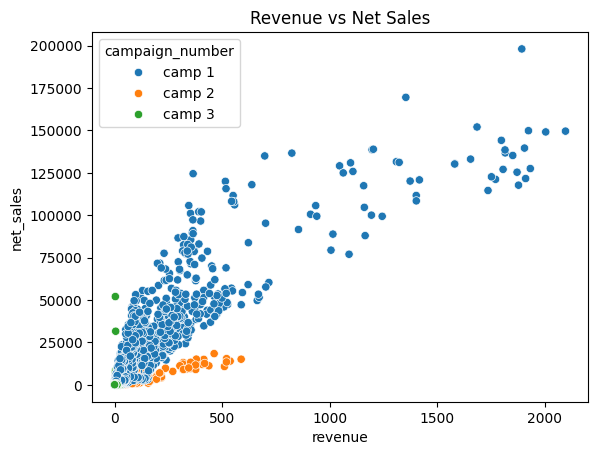

In [21]:
sns.scatterplot(data = adv, x= 'revenue', y= 'net_sales', hue= 'campaign_number')
plt.title('Revenue vs Net Sales')
plt.show()

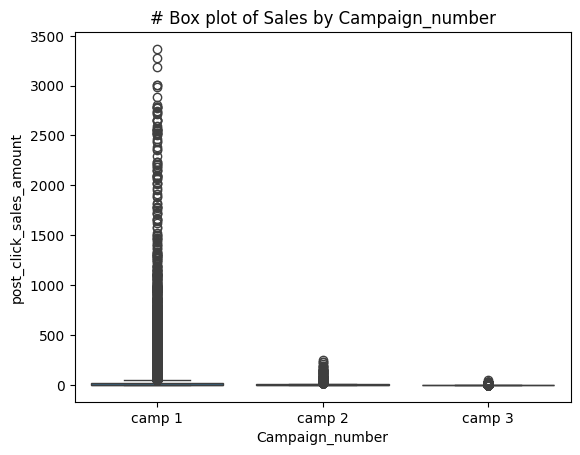

In [22]:
sns.boxplot(x='campaign_number', y='post_click_conversions', data=adv)
plt.title('# Box plot of Sales by Campaign_number')
plt.xlabel('Campaign_number')
plt.ylabel('post_click_sales_amount')
plt.show()

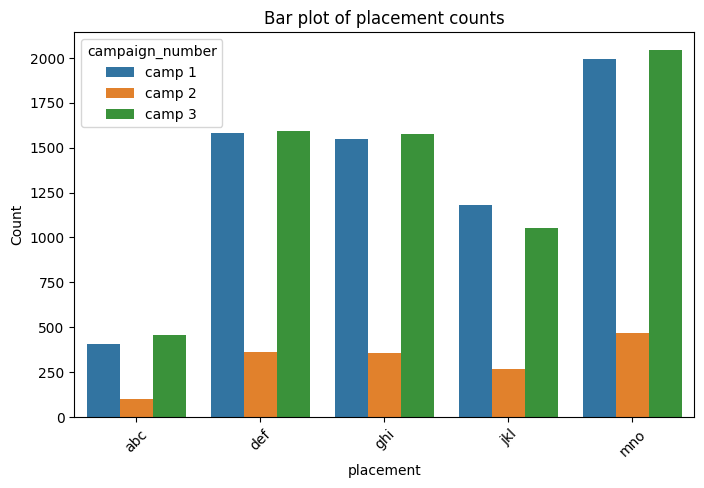

In [23]:
# Bar plot of campaign_number counts
plt.figure(figsize=(8, 5))
sns.countplot(data=adv, x='placement', hue= 'campaign_number')
plt.title('Bar plot of placement counts')
plt.xlabel('placement')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

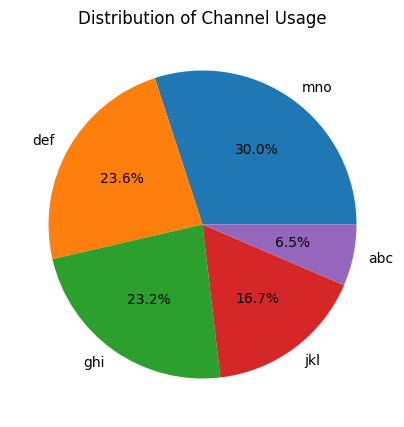

In [24]:
count1 = adv['placement'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(count1, labels=count1.index, autopct='%1.1f%%')
plt.title('Distribution of Channel Usage')
plt.show()

lets rename some columns for better understanding >

'placement':  'channel',

'clicks':  'NoOfClicks',

'revenue':  'CostOfCampaign',

'campaign_number':  'campaign_type'

In [25]:
# lets rename some columns for better understanding
adv = adv.rename(columns={'placement':'channel', 'clicks':'NoOfClicks', 'revenue':'CostOfCampaign', 'campaign_number':'campaign_type'})

In [26]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   campaign_type            15408 non-null  category      
 1   user_engagement          15408 non-null  category      
 2   banner                   15408 non-null  category      
 3   channel                  14995 non-null  category      
 4   displays                 15408 non-null  int64         
 5   NoOfClicks               15408 non-null  int64         
 6   CostOfCampaign           15408 non-null  float64       
 7   post_click_conversions   15408 non-null  int64         
 8   post_click_sales_amount  15408 non-null  float64       
 9   Date                     15408 non-null  datetime64[ns]
 10  net_sales                15408 non-null  float64       
dtypes: category(4), datetime64[ns](1), float64(3), int64(3)
memory usage: 903.8 KB


We will focus on 3 outputs from the campaign NoOfClicks, post_click_conversions,net_sales

analyze these fields based on the paramets campaignType, channel, user engagement, display etc

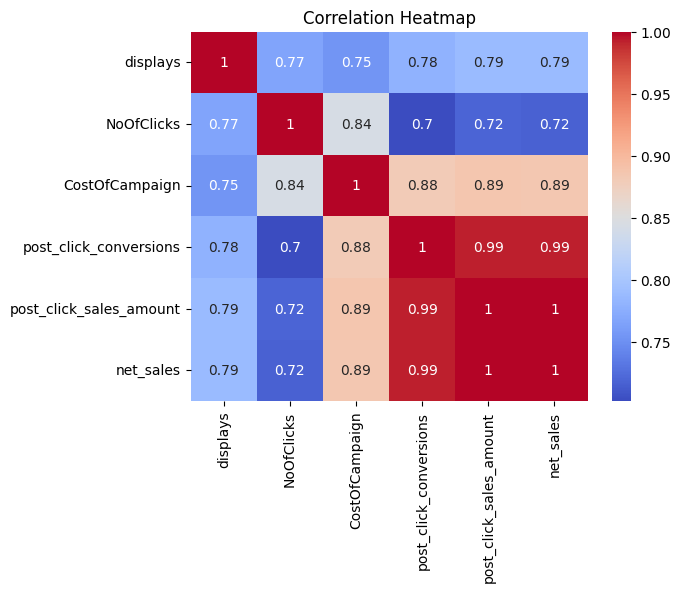

In [27]:
corr1 =adv.corr(numeric_only=True)
sns.heatmap(corr1, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Lets analyze the outputs w.r.t campaignType

In [28]:
adv_by_campaignType = adv.groupby(['campaign_type'])[['CostOfCampaign','NoOfClicks', 'net_sales','post_click_conversions']].sum()

<ipython-input-28-74d650bf4bb2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adv_by_campaignType = adv.groupby(['campaign_type'])[['CostOfCampaign','NoOfClicks', 'net_sales','post_click_conversions']].sum()


In [29]:
adv_by_campaignType

,CostOfCampaign,NoOfClicks,net_sales,post_click_conversions
campaign_type,,,,
camp 1,230535.3563,1409136,3.078221e+07,633085
camp 2,34890.4153,881158,1.132618e+06,13767
camp 3,10838.7905,202543,5.245285e+05,4916


In [30]:
# normalizing the values
adv_by_campaignType['CostOfCampaign'] = adv_by_campaignType['CostOfCampaign']/adv_by_campaignType['CostOfCampaign'].sum()
adv_by_campaignType['NoOfClicks'] = adv_by_campaignType['NoOfClicks']/adv_by_campaignType['NoOfClicks'].sum()
adv_by_campaignType['post_click_conversions'] = adv_by_campaignType['post_click_conversions']/adv_by_campaignType['post_click_conversions'].sum()
adv_by_campaignType['net_sales'] = adv_by_campaignType['net_sales']/adv_by_campaignType['net_sales'].sum()

In [31]:
adv_by_campaignType

,CostOfCampaign,NoOfClicks,net_sales,post_click_conversions
campaign_type,,,,
camp 1,0.834473,0.565274,0.948916,0.971335
camp 2,0.126293,0.353476,0.034915,0.021123
camp 3,0.039233,0.081250,0.016170,0.007543


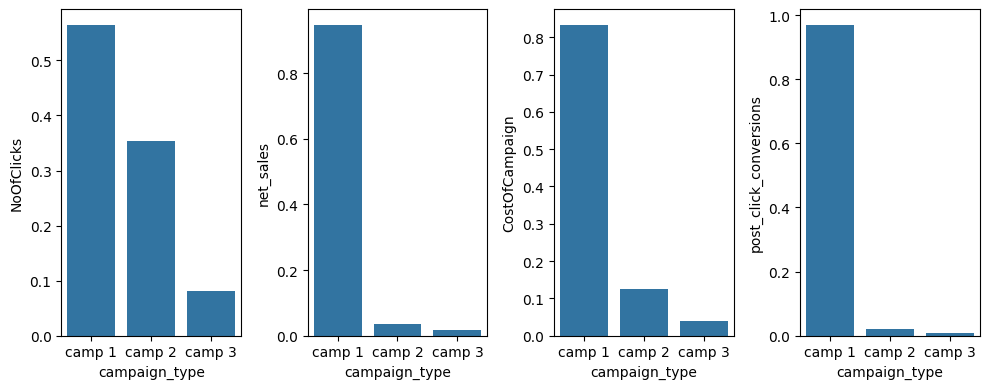

In [32]:
# plot to see the effect on different outputs

fig, axes = plt.subplots(1, 4, figsize=(10, 4))

# Plot 4: Barplot
sns.barplot(data=adv_by_campaignType, x="campaign_type", y="NoOfClicks", ax=axes[0])
sns.barplot(data=adv_by_campaignType, x="campaign_type", y="net_sales", ax=axes[1])
sns.barplot(data=adv_by_campaignType, x="campaign_type", y="CostOfCampaign", ax=axes[2])
sns.barplot(data=adv_by_campaignType, x="campaign_type", y="post_click_conversions", ax=axes[3])


plt.tight_layout()

Some important inferences based on campaign_type

Type1 > 56% NoOfClicks with conversion rate 97% and sales amount 95% (overall cost 83%)

Type2 > 35% NoOfClicks with conversion rate 2% and sales amount 3.5% (overall cost 13%)

Type3 > 8% NoOfClicks with conversion rate 0.7% and sales amount 1.5% (overall cost 4%)

Point1 >> Type1 is definitely the best among the campaign types with a overall conversion rate of 97% and overall Sales of 95%. But we can see the NoOfClicks% is low comapred to the sales% it generated. The company x should focus on Type1 to get more no of overall clicks so it geneartes even more sales.

Point2 >> Type2 is the least performer of all. Even though it genaerates significant overall click% but that does not convert into Sales as much. Company X needs to rethink its conversion strategy for Type2 or design a new strategy to target Type2 requirements.

Point3>> Type3 performs better compared to Type2. With the least clicks and conversion, it generates 1.5% with an cost of 4%. company X should focus on stategy to gain more clicks on Type3, they need to rethink on how to attract customers in this segment at least to click the ad.

Lets analyze the outputs w.r.t user_engagement          

In [33]:
adv_by_userengage = adv.groupby(['user_engagement'])[['CostOfCampaign','NoOfClicks', 'net_sales', 'post_click_conversions']].sum()

<ipython-input-33-2daecb650f38>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adv_by_userengage = adv.groupby(['user_engagement'])[['CostOfCampaign','NoOfClicks', 'net_sales', 'post_click_conversions']].sum()


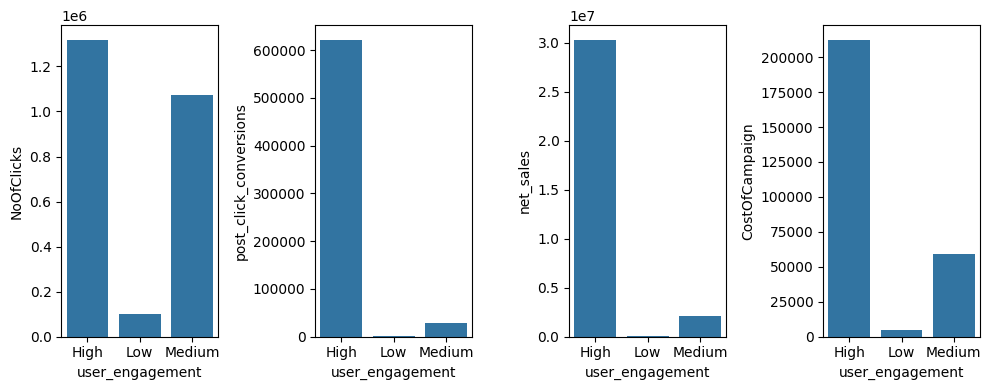

In [34]:
# plot to see the effect on different outputs

fig, axes = plt.subplots(1, 4, figsize=(10, 4))

# Plot 4: Barplot
sns.barplot(data=adv_by_userengage, x="user_engagement", y="NoOfClicks", ax=axes[0])
sns.barplot(data=adv_by_userengage, x="user_engagement", y="post_click_conversions", ax=axes[1])
sns.barplot(data=adv_by_userengage, x="user_engagement", y="net_sales", ax=axes[2])
sns.barplot(data=adv_by_userengage, x="user_engagement", y="CostOfCampaign", ax=axes[3])


plt.tight_layout()

In [35]:
# normalizing the values
adv_by_userengage['CostOfCampaign'] = adv_by_userengage['CostOfCampaign']/adv_by_userengage['CostOfCampaign'].sum()
adv_by_userengage['NoOfClicks'] = adv_by_userengage['NoOfClicks']/adv_by_userengage['NoOfClicks'].sum()
adv_by_userengage['post_click_conversions'] = adv_by_userengage['post_click_conversions']/adv_by_userengage['post_click_conversions'].sum()
adv_by_userengage['net_sales'] = adv_by_userengage['net_sales']/adv_by_userengage['net_sales'].sum()


In [36]:
adv_by_userengage

,CostOfCampaign,NoOfClicks,net_sales,post_click_conversions
user_engagement,,,,
High,0.768336,0.528463,0.933109,0.952673
Low,0.018628,0.040896,0.003192,0.002438
Medium,0.213037,0.430641,0.063699,0.044889


Some important inferences from the user engagement analysis

Point1 >> Medium engagement involves significant NoOfClicks% (43%) and significant cost% (21%) but generates only 6% of overall sales. Company X needs to work on strategies to improve the conversion rate on campaigns where user engagement is medium

Lets analyze the outputs w.r.t channel

In [37]:
adv_by_channel = adv.groupby(['channel'])[['NoOfClicks', 'post_click_conversions', 'net_sales', 'CostOfCampaign']].sum()

<ipython-input-37-ec8b0b37a5c4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adv_by_channel = adv.groupby(['channel'])[['NoOfClicks', 'post_click_conversions', 'net_sales', 'CostOfCampaign']].sum()


In [38]:
# normalizing the values
adv_by_channel['CostOfCampaign'] = (adv_by_channel['CostOfCampaign']/adv_by_channel['CostOfCampaign'].sum())*100
adv_by_channel['NoOfClicks'] = (adv_by_channel['NoOfClicks']/adv_by_channel['NoOfClicks'].sum())*100
adv_by_channel['post_click_conversions'] = (adv_by_channel['post_click_conversions']/adv_by_channel['post_click_conversions'].sum())*100
adv_by_channel['net_sales'] = (adv_by_channel['net_sales']/adv_by_channel['net_sales'].sum())*100

In [39]:
adv_by_channel

,NoOfClicks,post_click_conversions,net_sales,CostOfCampaign
channel,,,,
abc,0.063542,0.126426,0.131283,0.050770
def,7.064134,4.580785,4.815293,5.741327
ghi,50.025393,51.715340,50.239315,54.856208
jkl,3.011154,3.199461,3.309632,2.987896
mno,39.835777,40.377988,41.504476,36.363798


Some important inferences from the channel analysis

channel 'ghi' involves 50% click%, conversion rate 52% generating 50% overall sales%

channel 'mno' involves 40% click%, conversion rate 40% generating 41.5% overall sales%

Point1 >> Thses 2 channels ('ghi' & 'mno') draws 90% traffic and contribute to 91.5% overall sales%. company X needs to make strategies to keep the momentum going for these 2 channels and make sure the interaction through these channels remains smooth and flawless for the users/customers.

Point2 >> channel 'abc' do not have any prospect.

Point3 >> Channel ('def' & 'jkl') has some potential. Particularly if we look at channel 'jkl' with only 3% click%, only 3% conversion, overall cost 3% but generates 3.3% of sales%. If the NoOfClicks and the Conversion rate is improved for this channel, it could generate sales at a higher rate.


Lets analyze the outputs w.r.t banner  

In [40]:
adv_by_banner = adv.groupby(['banner'])[['NoOfClicks', 'post_click_conversions', 'net_sales', 'CostOfCampaign']].sum()

<ipython-input-40-b5faf1345e32>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adv_by_banner = adv.groupby(['banner'])[['NoOfClicks', 'post_click_conversions', 'net_sales', 'CostOfCampaign']].sum()


In [41]:
# normalizing the values
adv_by_banner['CostOfCampaign'] = (adv_by_banner['CostOfCampaign']/adv_by_banner['CostOfCampaign'].sum())*100
adv_by_banner['NoOfClicks'] = (adv_by_banner['NoOfClicks']/adv_by_banner['NoOfClicks'].sum())*100
adv_by_banner['post_click_conversions'] = (adv_by_banner['post_click_conversions']/adv_by_banner['post_click_conversions'].sum())*100
adv_by_banner['net_sales'] = (adv_by_banner['net_sales']/adv_by_banner['net_sales'].sum())*100

In [42]:
adv_by_banner

,NoOfClicks,post_click_conversions,net_sales,CostOfCampaign
banner,,,,
160 x 600,9.610336,7.485179,7.342039,8.512177
240 x 400,44.658195,41.405071,41.498323,47.031094
300 x 250,16.495824,18.379239,19.531478,15.626815
468 x 60,0.051949,0.084386,0.085563,0.031703
580 x 400,4.841111,4.872746,5.003430,4.051603
670 x 90,1.492396,1.629261,1.572710,1.456163
728 x 90,22.849709,26.143658,24.966114,23.290052
800 x 250,0.000481,0.000460,0.000343,0.000392


Some important inferences from the banner analysis

banner (240 x 400) involves 45% click%, conversion rate 41% generating 41% overall sales% (cost 47%)

banner (728 x 90) involves 23% click%, conversion rate 26% generating 25% overall sales% (cost 23%)

banner (300 x 250) involves 16% click%, conversion rate 18% generating 19% overall sales% (cost 15.5%)

Point1 >> Thses 3 banners draws 85% traffic and contribute to 86% overall sales%.

Point2 >> (800 x 250), (468 x 60), (670 x 90) these banners have almost no contribution to the sales. So these banners can be dropped from campaign.

Point3 >> Among the top performers banner (300 x 250) could be utilized more compared to others as it generates sales at a higher rate 19% compared to its cost 15.5%

Lets analyze the outputs w.r.t displays(no of ads)

In [43]:
# we are assuming that no of clicks <= displays, will remove the incorrect data later
adv[adv['NoOfClicks']> adv['displays']]

,campaign_type,user_engagement,banner,channel,displays,NoOfClicks,CostOfCampaign,post_click_conversions,post_click_sales_amount,Date,net_sales
13017,camp 1,Low,160 x 600,ghi,0,1,0.1080,0,0.0000,2020-06-14,-0.108
13179,camp 1,Medium,160 x 600,mno,99,138,14.8498,0,13.7518,2020-06-15,-1.098


We can see very high correlation between clicks/no of ads which is normal and expected


In [44]:
adv['displays'].corr(adv['NoOfClicks'])

np.float64(0.7669687607918148)

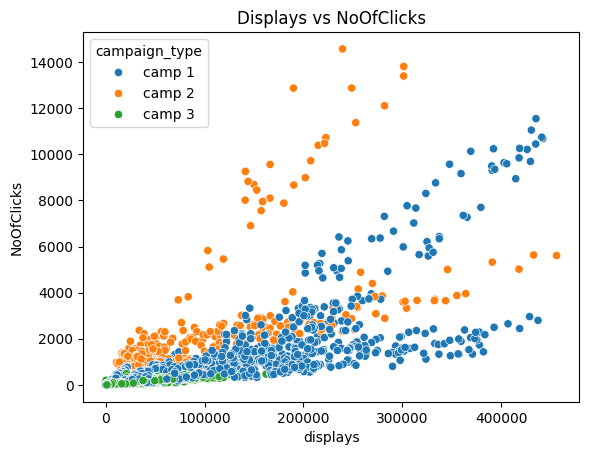

In [45]:
sns.scatterplot(data = adv, x= 'displays', y= 'NoOfClicks', hue= 'campaign_type')
plt.title('Displays vs NoOfClicks')
plt.show()

Analysis of display(no of ads)

Point1 >> Type1 has a quite linear relationship

Point2 >> Type3 is very less responsive to the change in display.

Point3 >> Type2 shows good response on a display range < 40000. company X needs to think how to improve beyond this range

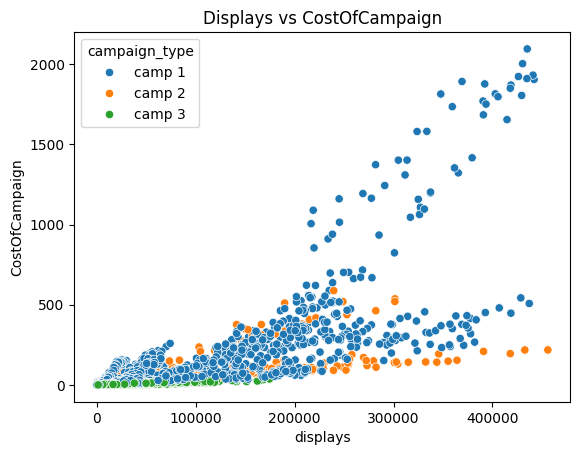

In [46]:
sns.scatterplot(data = adv, x= 'displays', y= 'CostOfCampaign', hue= 'campaign_type')
plt.title('Displays vs CostOfCampaign')
plt.show()


Analysis on CostOfCampaign

Type1 > cost increases at a higher rate after the range > 250000, comapny might want to optimize on Type1 and utilize remaining resources on other types

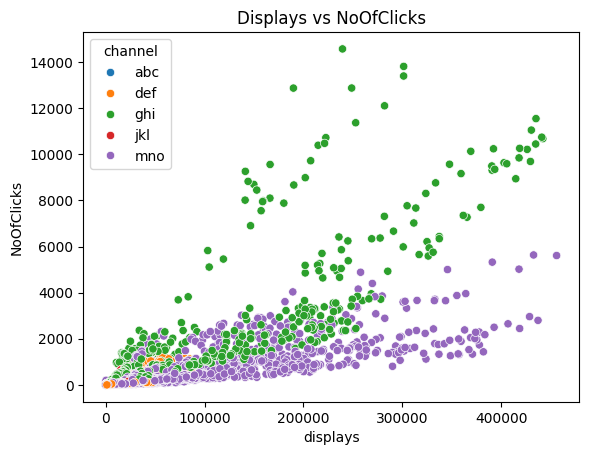

In [47]:
sns.scatterplot(data = adv, x= 'displays', y= 'NoOfClicks', hue= 'channel')
plt.title('Displays vs NoOfClicks')
plt.show()

Analysis by channel

channel 'ghi' changes at a higher rate than 'mno', particularly in higher range > 150000. company X should think about utilizing more displays(ads) on channel 'ghi'

channel 'def' has some potential. company can think about allocating more displays(ads) to channel 'def' and see the result

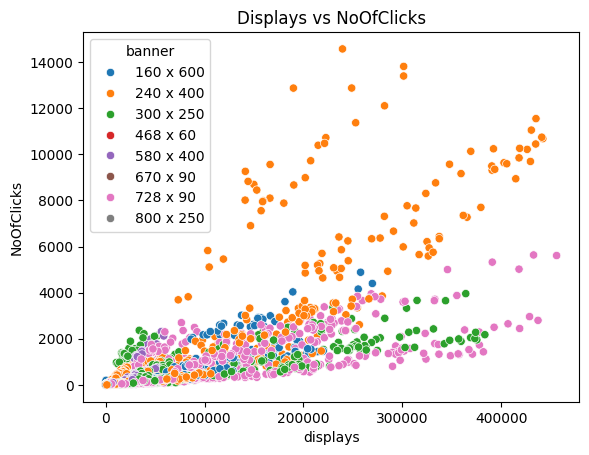

In [48]:
sns.scatterplot(data = adv, x= 'displays', y= 'NoOfClicks', hue= 'banner')
plt.title('Displays vs NoOfClicks')
plt.show()

Lets analyze the outputs w.r.t type and channel

In [49]:
adv_by_type_channel = adv.groupby(['campaign_type','channel'])[['NoOfClicks', 'post_click_conversions', 'net_sales', 'CostOfCampaign']].sum()

<ipython-input-49-7dff39fc99bb>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adv_by_type_channel = adv.groupby(['campaign_type','channel'])[['NoOfClicks', 'post_click_conversions', 'net_sales', 'CostOfCampaign']].sum()


In [50]:
# normalizing the values
adv_by_type_channel['CostOfCampaign'] = (adv_by_type_channel['CostOfCampaign']/adv_by_type_channel['CostOfCampaign'].sum())*100
adv_by_type_channel['NoOfClicks'] = (adv_by_type_channel['NoOfClicks']/adv_by_type_channel['NoOfClicks'].sum())*100
adv_by_type_channel['post_click_conversions'] = (adv_by_type_channel['post_click_conversions']/adv_by_type_channel['post_click_conversions'].sum())*100
adv_by_type_channel['net_sales'] = (adv_by_type_channel['net_sales']/adv_by_type_channel['net_sales'].sum())*100

In [51]:
adv_by_type_channel

NoOfClicks  post_click_conversions  net_sales  \
campaign_type channel                                                  
camp 1        abc        0.054155                0.123971   0.124393   
              def        2.720921                4.351869   4.461936   
              ghi       33.076557               50.481921  48.294943   
              jkl        1.726029                3.085310   3.105701   
              mno       18.949813               39.090410  38.904552   
camp 2        abc        0.000521                0.000000  -0.000002   
              def        3.105825                0.157112   0.246251   
              ghi       15.707637                1.050837   1.611606   
              jkl        1.094298                0.086534   0.139068   
              mno       15.439308                0.817778   1.494590   
camp 3        abc        0.008865                0.002455   0.006892   
              def        1.237388                0.071805   0.107106   
              ghi        1.241199                0.182581   0.332766   
              jkl        0.190827                0.027617   0.064862   
              mno        5.446657                0.469801   1.105334   

                       CostOfCampaign  
campaign_type channel                  
camp 1        abc            0.046202  
              def            4.033034  
              ghi           48.639613  
              jkl            2.505471  
              mno           28.223043  
camp 2        abc            0.000190  
              def            1.112251  
              ghi            5.616493  
              jkl            0.390641  
              mno            5.509759  
camp 3        abc            0.004378  
              def            0.596042  
              ghi            0.600103  
              jkl            0.091783  
              mno            2.630996

Some important inferences from the above data

camp1 + 'mno' > has much potential as it generates 39% sales from 28% overall cost

camp2 can drop some channels > 'abc' and 'jkl'.
Channel 'ghi', 'mno' has good potential with overall click 31% but sales only 1.5% with cost 5.5%. company X should come up with strategies to increase the conversion rate to generate more sales with thses channels

Lets analyze the outputs w.r.t date

In [52]:
adv_by_date = adv.groupby(['Date'])[['NoOfClicks', 'post_click_conversions', 'net_sales', 'CostOfCampaign']].sum()

In [53]:
adv_by_date

,NoOfClicks,post_click_conversions,net_sales,CostOfCampaign
Date,,,,
2020-04-01,70959,9664,524291.1737,7119.3729
2020-04-02,61968,8655,461022.7748,5886.1942
2020-04-03,73219,10254,524274.9146,6709.9982
2020-04-04,84224,10510,529891.4207,8017.3188
2020-04-05,78538,11167,567718.6341,7582.7687
...,...,...,...,...
2020-06-26,7080,4616,211260.3074,708.9940
2020-06-27,11738,6153,293392.1638,1175.3413
2020-06-28,10032,5759,274849.4697,1041.2646


In [54]:
# normalizing the values
adv_by_date['CostOfCampaign'] = (adv_by_date['CostOfCampaign']/adv_by_date['CostOfCampaign'].sum())*100
adv_by_date['NoOfClicks'] = (adv_by_date['NoOfClicks']/adv_by_date['NoOfClicks'].sum())*100
adv_by_date['post_click_conversions'] = (adv_by_date['post_click_conversions']/adv_by_date['post_click_conversions'].sum())*100
adv_by_date['net_sales'] = (adv_by_date['net_sales']/adv_by_date['net_sales'].sum())*100

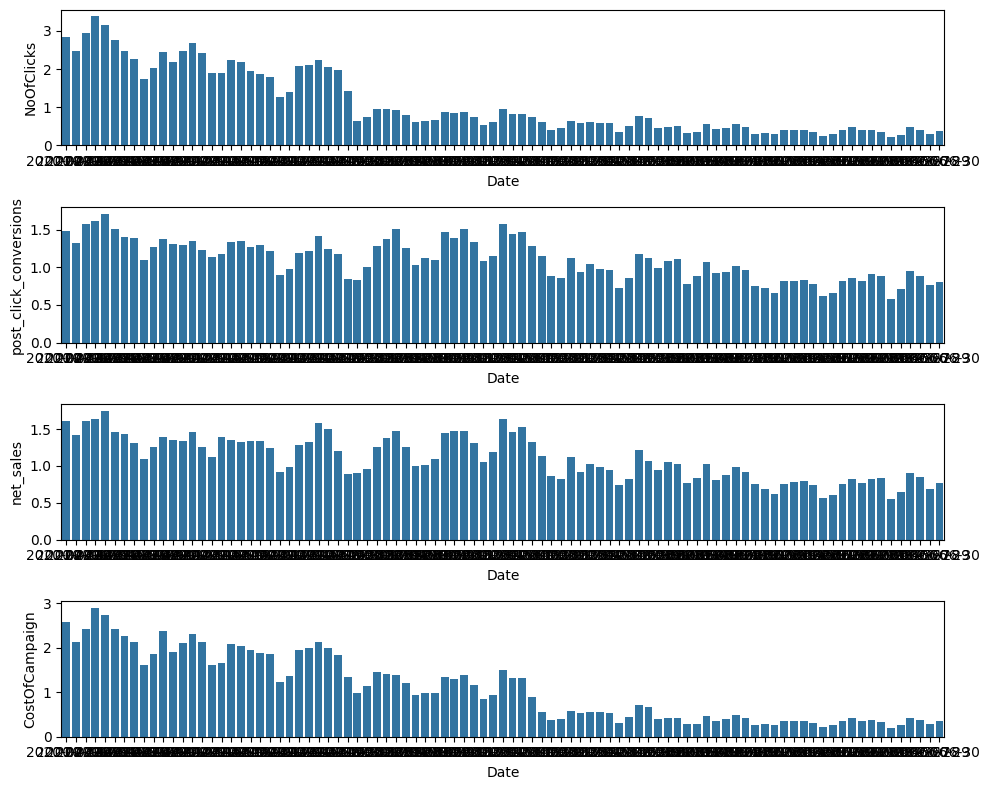

In [55]:
# plot to see the effect on different outputs
fig, axes = plt.subplots(4, 1, figsize=(10, 8))

# Plot 4: Barplot
sns.barplot(data=adv_by_date, x="Date", y="NoOfClicks", ax=axes[0])
sns.barplot(data=adv_by_date, x="Date", y="post_click_conversions", ax=axes[1])
sns.barplot(data=adv_by_date, x="Date", y="net_sales", ax=axes[2])
sns.barplot(data=adv_by_date, x="Date", y="CostOfCampaign", ax=axes[3])


plt.tight_layout()

Analysis by Date

We observe, NoOfClicks decreases rapidly after the first month of campaign but sales do not decrease at the same rate and continue to generate significant amount. Company x should devise strategies on how to increase no of clicks on the last 2 months so it can help generate more sales on last 2 months

Lets build some models

Lets drop some columns which are not necessary. We dont need Date column unless we are doing time-series. Since we are asked to increase their yield in terms of marketing goals we can focus on 2 targets : primary target being net_sales
and secondary target being no of clicks

While building the model we have to consider the fact that target and feature columns are too much corelated, so we can either drop the columns or use standardization like Ridge or Lasso

In [56]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   campaign_type            15408 non-null  category      
 1   user_engagement          15408 non-null  category      
 2   banner                   15408 non-null  category      
 3   channel                  14995 non-null  category      
 4   displays                 15408 non-null  int64         
 5   NoOfClicks               15408 non-null  int64         
 6   CostOfCampaign           15408 non-null  float64       
 7   post_click_conversions   15408 non-null  int64         
 8   post_click_sales_amount  15408 non-null  float64       
 9   Date                     15408 non-null  datetime64[ns]
 10  net_sales                15408 non-null  float64       
dtypes: category(4), datetime64[ns](1), float64(3), int64(3)
memory usage: 903.8 KB


Trying a linear regression model on net_sales as target

Will drop below columns as they have too much corelation with target >>

post_click_sales_amount / post_click_conversions/ CostOfCampaign/ Date

Fill the null data with mode value for channel column

In [57]:
lr1data = adv.drop(['post_click_sales_amount', 'post_click_conversions' , 'CostOfCampaign', 'Date'], axis=1)

In [58]:
lr1data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   campaign_type    15408 non-null  category
 1   user_engagement  15408 non-null  category
 2   banner           15408 non-null  category
 3   channel          14995 non-null  category
 4   displays         15408 non-null  int64   
 5   NoOfClicks       15408 non-null  int64   
 6   net_sales        15408 non-null  float64 
dtypes: category(4), float64(1), int64(2)
memory usage: 422.3 KB


In [59]:
lr1data.isnull().sum().sum()

np.int64(413)

In [60]:
lr1data['channel'].isna().sum()

np.int64(413)

In [61]:
lr1data['channel'] = lr1data['channel'].fillna('mno')

In [62]:
lr1data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   campaign_type    15408 non-null  category
 1   user_engagement  15408 non-null  category
 2   banner           15408 non-null  category
 3   channel          15408 non-null  category
 4   displays         15408 non-null  int64   
 5   NoOfClicks       15408 non-null  int64   
 6   net_sales        15408 non-null  float64 
dtypes: category(4), float64(1), int64(2)
memory usage: 422.3 KB


In [63]:
# lets encode the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

lr1data['campaign_type'] = le.fit_transform(lr1data['campaign_type'])
lr1data['user_engagement'] = le.fit_transform(lr1data['user_engagement'])
lr1data['channel'] = le.fit_transform(lr1data['channel'])
lr1data['banner'] = le.fit_transform(lr1data['banner'])

In [64]:
x = lr1data.drop(['net_sales'], axis=1)
y = lr1data['net_sales']

In [65]:
# split into train test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=16)

In [66]:
# lets scale some of the columns
from sklearn.preprocessing import  StandardScaler
sc = StandardScaler()

x_train[['displays','NoOfClicks']] = sc.fit_transform(x_train[['displays', 'NoOfClicks']])
x_test[['displays','NoOfClicks']] = sc.transform(x_test[['displays', 'NoOfClicks']])

In [67]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error

In [68]:
lr1 = LinearRegression()
lr1.fit(x_train, y_train)

LinearRegression()

In [69]:
print(lr1.score(x_train, y_train))
print(lr1.score(x_test, y_test))

0.6771318530882351
0.6887031359824896


In [70]:
r2_score(y_test, lr1.predict(x_test))

0.6887031359824896

The model score says that 69% of total variation is explained by the model and 31% is not explained. This score looks decent based on the fact that we are trying to predict human behaviour on marketing campaigns and the model is a linear regression model

We will try with Ridge/Lasso to see we can improve our model score

In [71]:
r1 = Ridge(alpha=10)
r1.fit(x_train, y_train)

Ridge(alpha=10)

In [72]:
print(r1.score(x_train, y_train))
print(r1.score(x_test, y_test))

0.6771316151525479
0.6886864657128415


We tried with different alpha values 0.1, 1, 10 but do not see much improvement with this method, lets try lasso

In [73]:
from sklearn.linear_model import  Lasso

In [74]:
l1 = Lasso(alpha=10)
l1.fit(x_train, y_train)

Lasso(alpha=10)

In [75]:
print(l1.score(x_train, y_train))
print(l1.score(x_test, y_test))

0.677128122815893
0.6886551323696001


We tried with different alpha values 0.1, 1, 10 but do not see much improvement with this method

Lets try with XGBoost which can perform regression over Linear or NonLinear data

In [76]:
# lets try xgboost and see if we can improve model score
import xgboost as xgb

In [77]:
xgb1 = xgb.XGBRegressor(
    objective='reg:squarederror',  # Standard regression
    n_estimators=100,              # Number of trees
    max_depth=3,                   # Controls nonlinearity (deeper → more complex)
    learning_rate=0.05,            # to prevent overfitting
    random_state=16

)

In [78]:
xgb1.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=16, ...)

In [79]:
y_pred_xgb = xgb1.predict(x_test)

In [81]:
r2_score(y_test, y_pred_xgb)

0.9407962486097973

In [80]:
print(xgb1.score(x_train, y_train))
print(xgb1.score(x_test, y_test))

0.9601946112576847
0.9407962486097973


Final try was XGboost and we can see the model score improved significantly to an impressive 94%